#  一.初音女神

In [54]:
import matplotlib
import numpy as np
from PIL import Image
from matplotlib.pyplot import imshow

(500, 500)


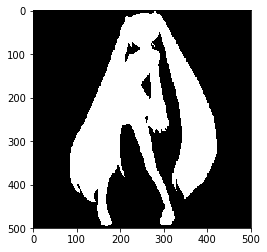

In [83]:
miku = pd.read_csv("../data/miku")
miku = np.array(miku.values)

miku_grayscale = miku[:, 2]

miku_grayscale = miku_grayscale.reshape((500, 500))
miku_grayscale = miku_grayscale.transpose()

image = Image.fromarray(miku_grayscale*255)
print(image.size)
imshow(image)
# image.show()
# np.random.shuffle(miku)
miku_data = miku[:, 0:2]
miku_target = miku[:, 2]

# 二.Decision Tree

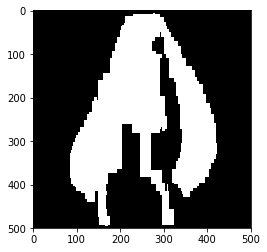

In [103]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(miku_data, miku_target)
predict = clf1.predict(miku_data)
predict = predict.reshape((500, 500))
predict = predict.transpose()

image_pre = Image.fromarray(predict*255)
# image_pre.show()
imshow(image_pre)

# 三.Bagging

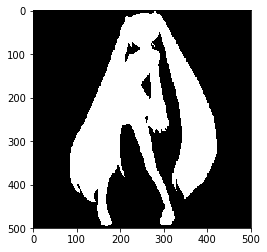

In [108]:
# bagging
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
# clf = BaggingClassifier(DecisionTreeClassifier(max_depth=5), n_estimators=100)
clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=100)

clf.fit(miku_data, miku_target)

predict = clf.predict(miku_data)
predict = predict.reshape((500, 500))
predict = predict.transpose()

image_pre = Image.fromarray(predict*255)
# image_pre.show()
imshow(image_pre)

# 四.Boosting

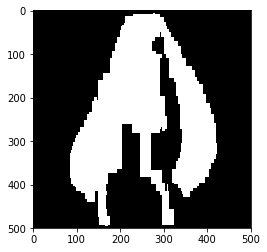

In [84]:
# adaboost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
clf1 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5), n_estimators=10)


clf1.fit(miku_data, miku_target)

predict1 = clf1.predict(miku_data)
predict1 = predict1.reshape((500, 500))
predict1 = predict1.transpose()

image_pre1 = Image.fromarray(predict1*255)
# image_pre.show()
imshow(image_pre1)

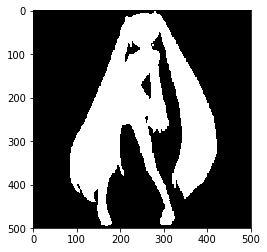

In [85]:
clf2 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5), n_estimators=100)
clf2.fit(miku_data, miku_target)
predict2 = clf2.predict(miku_data)
predict2 = predict2.reshape((500, 500))
predict2 = predict2.transpose()
image_pre2 = Image.fromarray(predict2*255)
imshow(image_pre2)

# 五.GBDT

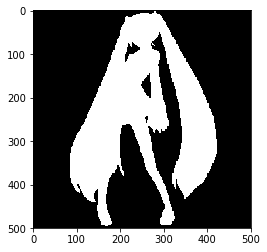

In [102]:
from sklearn.ensemble import GradientBoostingClassifier
clf3 = GradientBoostingClassifier(max_depth=10,n_estimators=100)
clf3.fit(miku_data, miku_target)
predict4 = clf3.predict(miku_data)
predict4 = predict4.reshape((500, 500))
predict4 = predict4.transpose()

image_pre4 = Image.fromarray(predict4*255)
# image_pre.show()
imshow(image_pre4)

# 六.XGBoost

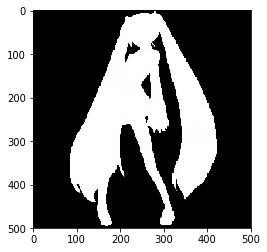

In [97]:
import xgboost as xgb
param = {'max_depth':5, 
         'eta':1, 
         'silent':1, 
         'objective':'binary:logistic',
         'n_estimators':10,
        }
num_rounds = 500 # 迭代次数
xgb_train=xgb.DMatrix(miku_data,label=miku_target)
xgb_test=xgb.DMatrix(miku_data)

model = xgb.train(param, xgb_train, num_rounds)

predict3=model.predict(xgb_test)
predict3 = predict3.reshape((500, 500))
predict3 = predict3.transpose()
image_pre3 = Image.fromarray(predict3*255)
imshow(image_pre3)